# Lab | Customer Analysis - Round 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data5=pd.read_csv('marketing_customer_analysis.csv')
data5.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [3]:
#X-y split : y -> Total Claim Amount

data5_y = data5['Total Claim Amount']
data5_x = data5.drop('Total Claim Amount', axis=1)
data5_x_columns = list(data5_x.columns)
data5_x_columns

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [4]:
# Normalize (numerical).

data6 = data5[["Customer Lifetime Value","Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Number of Policies", "Total Claim Amount"]]
data5_n=data5.select_dtypes('number')
data_col=list(data5_n.columns)

from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(data5_n)
x_normalized = transformer.transform(data5_n)
x_normalized

array([[4.90479814e-02, 9.98772156e-01, 1.22463800e-03, ...,
        0.00000000e+00, 1.77483768e-05, 6.82977323e-03],
       [9.87006407e-01, 0.00000000e+00, 1.32929472e-02, ...,
        0.00000000e+00, 1.13131466e-03, 1.60005358e-01],
       [2.55477793e-01, 9.66746974e-01, 2.14096978e-03, ...,
        0.00000000e+00, 3.96475885e-05, 1.12296293e-02],
       ...,
       [9.95277200e-01, 0.00000000e+00, 1.03625303e-02, ...,
        3.65736364e-04, 2.43824242e-04, 9.64062747e-02],
       [3.24247237e-01, 9.45493129e-01, 4.13688256e-03, ...,
        0.00000000e+00, 1.29277580e-04, 2.97855545e-02],
       [9.89138089e-01, 0.00000000e+00, 2.91609456e-02, ...,
        0.00000000e+00, 3.78713580e-04, 1.39972539e-01]])

In [5]:
data6=pd.DataFrame(x_normalized,columns=data_col)
data6.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


In [6]:
x_normalized.T

array([[4.90479814e-02, 9.87006407e-01, 2.55477793e-01, ...,
        9.95277200e-01, 3.24247237e-01, 9.89138089e-01],
       [9.98772156e-01, 0.00000000e+00, 9.66746974e-01, ...,
        0.00000000e+00, 9.45493129e-01, 0.00000000e+00],
       [1.22463800e-03, 1.32929472e-02, 2.14096978e-03, ...,
        1.03625303e-02, 4.13688256e-03, 2.91609456e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.65736364e-04, 0.00000000e+00, 0.00000000e+00],
       [1.77483768e-05, 1.13131466e-03, 3.96475885e-05, ...,
        2.43824242e-04, 1.29277580e-04, 3.78713580e-04],
       [6.82977323e-03, 1.60005358e-01, 1.12296293e-02, ...,
        9.64062747e-02, 2.97855545e-02, 1.39972539e-01]])

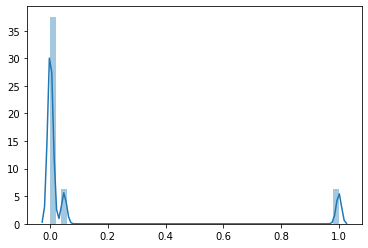

In [7]:
sns.distplot(x_normalized[0])
plt.show()

Processing Data

In [8]:
data7 = data5.drop(columns = ["Customer Lifetime Value","Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Number of Policies", "Total Claim Amount", "Customer", "Effective To Date"], inplace=False)

In [9]:
data7.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
data7.dtypes

State               object
Response            object
Coverage            object
Education           object
EmploymentStatus    object
Gender              object
Location Code       object
Marital Status      object
Policy Type         object
Policy              object
Renew Offer Type    object
Sales Channel       object
Vehicle Class       object
Vehicle Size        object
dtype: object

In [11]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='error').fit(data7)
encoded = encoder.transform(data7).toarray()
encoded_names = list(encoder.get_feature_names())

data7 = pd.get_dummies(data7, drop_first = True)


display(data7)

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
encoded.shape

(9134, 57)

In [13]:
df = pd.DataFrame(encoded,columns=encoded_names)

In [14]:
df.head()

,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Concat DataFrames

y = data6["Total Claim Amount"]
x = data6.drop("Total Claim Amount", axis=1)

In [16]:
x = x.select_dtypes('number')

In [17]:
transformer =Normalizer().fit(x)
x_normalized = transformer.transform(x)

In [18]:
df_new = pd.DataFrame(x_normalized)

In [19]:
data = pd.concat([df, df_new], join = 'inner', axis = 1)
data.head()

,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x13_Large,x13_Medsize,x13_Small,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


Linear Regression

In [20]:
# Train-test split.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                               random_state=100)

In [21]:
# Apply linear regression.

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
model = regression.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(y_pred)

[0.00360032 0.03129694 0.00737697 ... 0.00785053 0.00532057 0.00813376]


Model Validation

In [22]:
# Description: R2. MSE. RMSE. MAE.

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

R2=r2_score(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=sqrt(MSE)
MAE=mean_absolute_error(y_test, y_pred)

print("MAE = ", MAE)
print("R2  = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

MAE =  0.010252804590244993
R2  =  0.8448908436828297
MSE =  0.0004768610203469513
RMSE =  0.02183714771546301


# Lab | Customer Analysis - Round 7

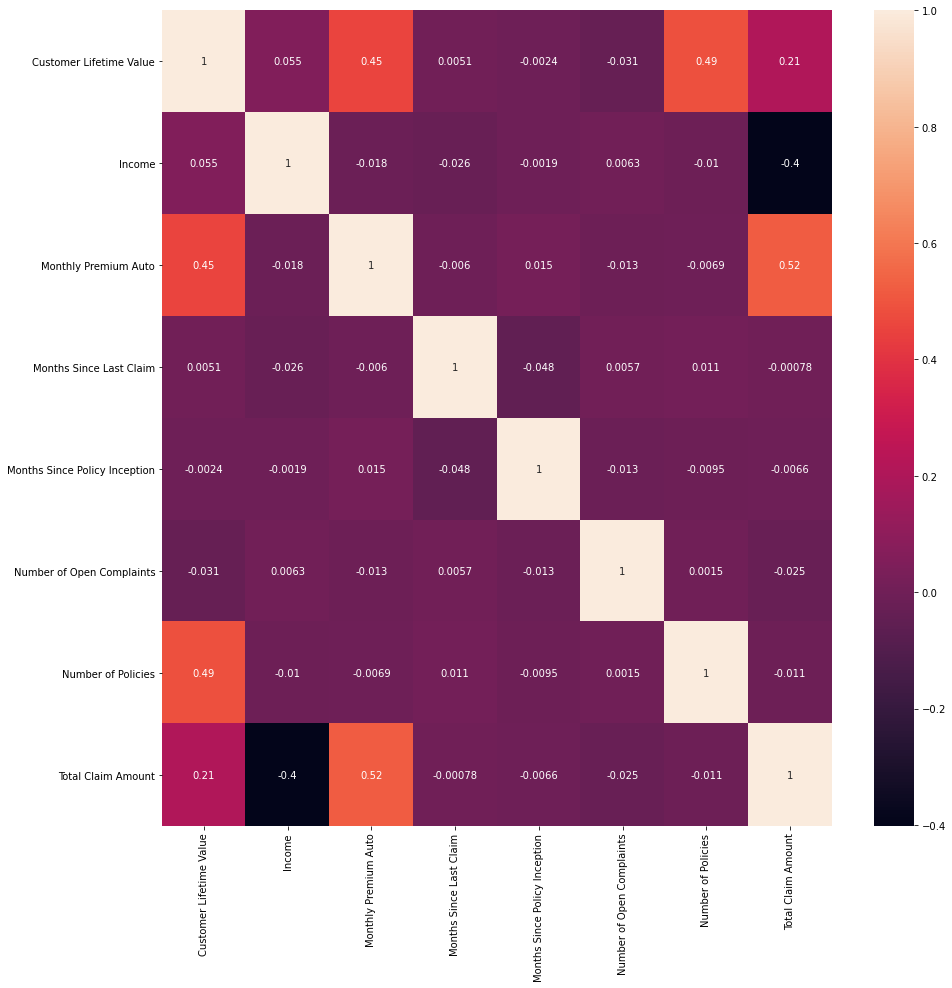

In [24]:
#  Remove the outliers/insignificant variables ?

corr_matrix_pearson = data5_n.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix_pearson, annot=True)
plt.show()

In [25]:
# Calcul VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculvif(x):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

X = data5_n.iloc[:,:-1]
calculvif(x)

,variables,VIF
0,Customer Lifetime Value,5.785453
1,Income,1.103094
2,Monthly Premium Auto,8.570461
3,Months Since Last Claim,2.907386
4,Months Since Policy Inception,3.371080
5,Number of Open Complaints,1.217043
6,Number of Policies,2.389978


In [26]:
# Analyse : 

# Monthly Premium Auto a un VIF supérieur à 5, ce qui indique une forte 
# multicollinéarité entre entre cette variable indépendant et les autres.
# Il faut l'enlever pour  diminuer la multicollinéarité.

data7 = data5_n.drop(['Monthly Premium Auto'],axis=1)
calculvif(data7)

,variables,VIF
0,Customer Lifetime Value,2.464493
1,Income,2.238585
2,Months Since Last Claim,2.687899
3,Months Since Policy Inception,3.092350
4,Number of Open Complaints,1.163372
5,Number of Policies,2.265310
6,Total Claim Amount,3.002417


In [27]:
# Meilleur résultat après avoir enlevé la variable

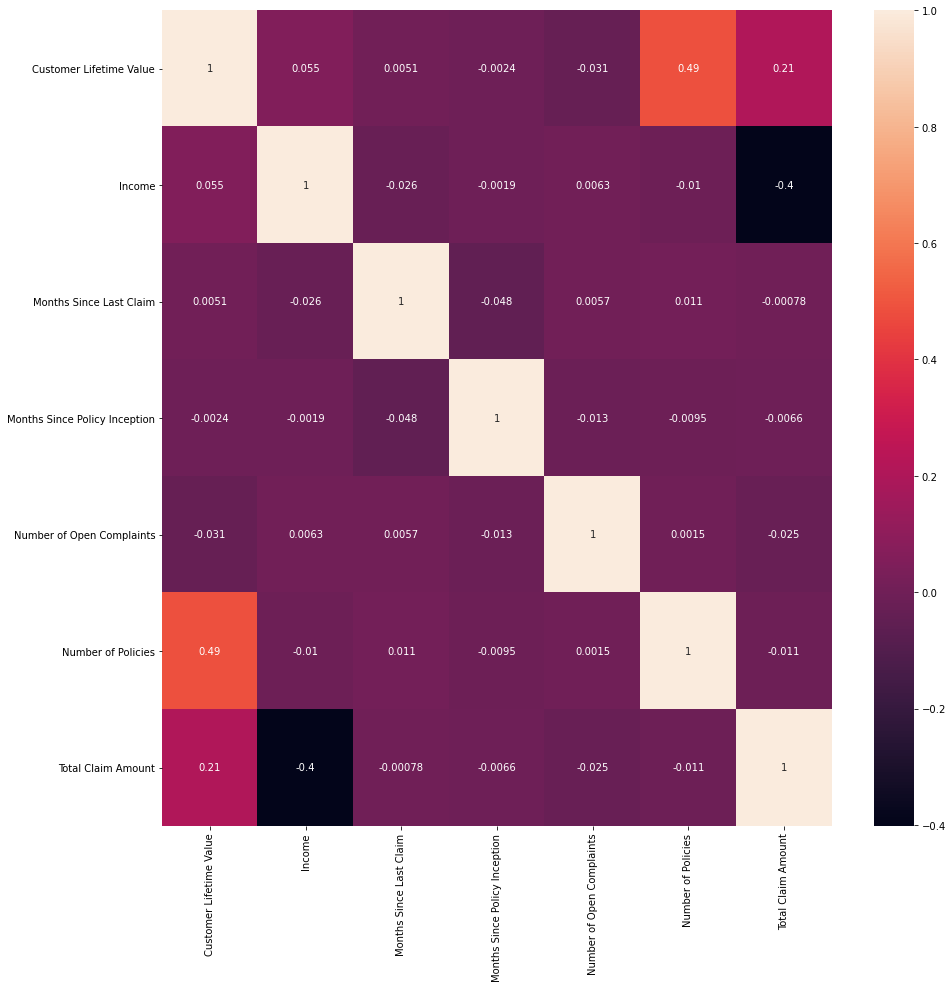

In [28]:
corr_matrix_pearson = data7.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix_pearson, annot=True)
plt.show()

In [29]:
#  Use a different ratio for Train-test split.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)
x_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
8720,0.339873,0.940130,0.005138,0.002308,0.001117,0.000298,0.000223
6092,0.552628,0.833304,0.002920,0.000107,0.000997,0.000000,0.000071
1412,0.082391,0.996588,0.001077,0.000114,0.000669,0.000033,0.000147
4717,0.070641,0.997489,0.001735,0.000468,0.000661,0.000000,0.000014
3725,0.996445,0.000000,0.011586,0.001867,0.001223,0.000193,0.000129


In [30]:
from sklearn.model_selection import train_test_split
x_trainbis,x_testbis,y_trainbis,y_testbis=train_test_split(x,y,test_size=0.3, random_state=200)
x_trainbis.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
1736,0.354293,0.934986,0.003388,0.000052,0.001407,0.000000,0.000104
8996,0.653747,0.756316,0.002313,0.000552,0.001174,0.000000,0.000069
60,0.245221,0.969307,0.003575,0.000055,0.001980,0.000055,0.000165
2088,0.402006,0.914875,0.005307,0.002230,0.004384,0.000000,0.000385
7913,0.336465,0.941395,0.004824,0.002689,0.000870,0.000158,0.000237


In [34]:
y = data7['Total Claim Amount']
x = data7.drop('Total Claim Amount',axis=1)

x = x.select_dtypes('number')

transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)

cols = list(x.columns)

Customer Lifetime Value


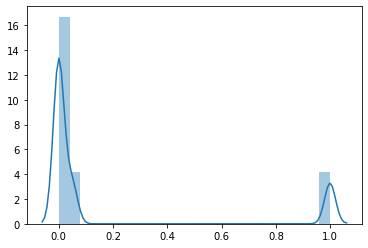

Income


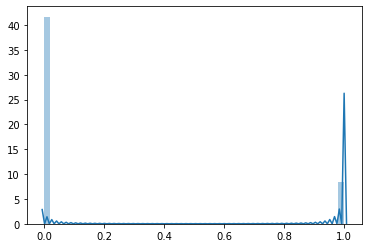

Months Since Last Claim


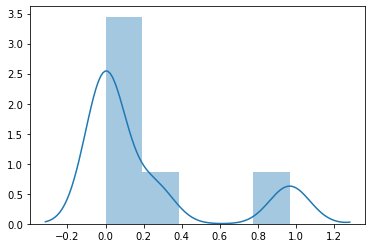

Months Since Policy Inception


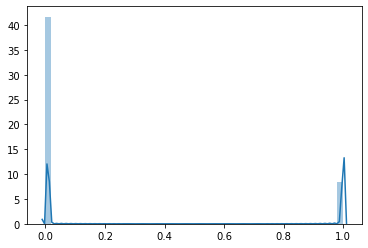

Number of Open Complaints


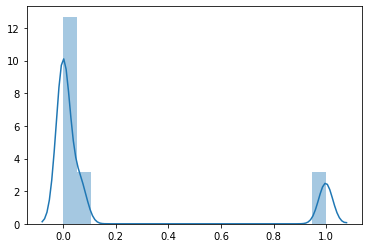

Number of Policies


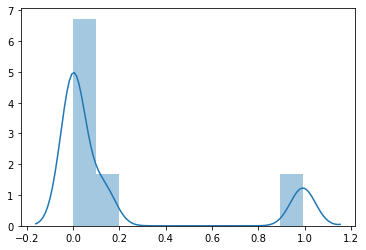

In [35]:

## Creating loop for showing the box plot of Normalized data
for i in range(len(cols)):
    print (cols[i])
    sns.distplot(x_normalized[i])
    plt.show()
    
i=i+1